# Generating SQL for SQLite using Ollama, ChromaDB
This notebook runs through the process of using the `vanna` Python package to generate SQL using AI (RAG + LLMs) including connecting to a database and training. If you're not ready to train on your own database, you can still try it using a sample [SQLite database](app.md).


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which LLM do you want to use?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI via Vanna.AI (Recommended)</div>
        <small class="w-full">Use Vanna.AI for free to generate your queries</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI</div>
        <small class="w-full">Use OpenAI with your own API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Azure OpenAI</div>
        <small class="w-full">If you have OpenAI models deployed on Azure</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> Ollama</div>
        <small class="w-full">Use Ollama locally for free. Requires additional setup.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-mistral-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Mistral via Mistral API</div>
        <small class="w-full">If you have a Mistral API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-other-llm-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other LLM</div>
        <small class="w-full">If you have a different LLM model</small>
      </div>
    </a>
  </li>
    
</ul>
    


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Where do you want to store the 'training' data?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-ollama-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Vanna Hosted Vector DB (Recommended)</div>
        <small class="w-full">Use Vanna.AIs hosted vector database (pgvector) for free. This is usable across machines with no additional setup.</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> ChromaDB</div>
        <small class="w-full">Use ChromaDBs open-source vector database for free locally. No additional setup is necessary -- all database files will be created and stored locally.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-ollama-marqo/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Marqo</div>
        <small class="w-full">Use Marqo locally for free. Requires additional setup. Or use their hosted option.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-ollama-other-vectordb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other VectorDB</div>
        <small class="w-full">Use any other vector database. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
</ul>
    

## Setup

In [1]:
import warnings
import re

warnings.filterwarnings('ignore', category=DeprecationWarning, message='^Number of requested results')
# warnings.filterwarnings('ignore', category=DeprecationWarning, message=re.escape(r'^Some regex pattern'))

import os

import re
from time import time
from datetime import datetime 

from vanna.ollama import Ollama
from vanna.chromadb.chromadb_vector import ChromaDB_VectorStore

In [2]:
model_name = 'deepseek-coder-v2'
CONFIG = {
    'model': model_name,   # 'mistral' # "starcoder2"
}

file_db = "~/Downloads/chinook.sqlite"

clean_and_train = True  # False  

sql_id = 1
NUM_RETRY = 3

allow_llm_to_see_data = True
# allow_llm_to_see_data (bool): Whether to allow the LLM to see the data (for the purposes of introspecting the data to generate the final SQL).

In [3]:
class MyVanna(ChromaDB_VectorStore, Ollama):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        Ollama.__init__(self, config=config)

def remove_collections(collection_name=None, ACCEPTED_TYPES = ["sql", "ddl", "documentation"]):
    if not collection_name:
        collections = ACCEPTED_TYPES
    elif isinstance(collection_name, str):
        collections = [collection_name]
    elif isinstance(collection_name, list):
        collections = collection_name
    else:
        print(f"\t{collection_name} is unknown: Skipped")
        return

    for c in collections:
        if not c in ACCEPTED_TYPES:
            print(f"\t{c} is unknown: Skipped")
            continue
            
        # print(f"vn.remove_collection('{c}')")
        vn.remove_collection(c)

def strip_brackets(ddl):
    """
    This function removes square brackets from table and column names in a DDL script.
    
    Args:
        ddl (str): The DDL script containing square brackets.
    
    Returns:
        str: The DDL script with square brackets removed.
    """
    # Use regular expressions to match and replace square brackets
    pattern = r"\[([^\]]+)]"  # Match any character except ] within square brackets
    return re.sub(pattern, r"\1", ddl)

def my_vn_ask(question, sql_id, allow_llm_to_see_data=False, num_retry=NUM_RETRY, separator=80*'='):
    # allow retry by appending error msg to question
    print(f"\n{separator}\n# QUESTION - {sql_id}:  {question}\n{separator}\n")
    sql, df, fig, err_msg = vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
    if not err_msg or ("[ERROR-SQL]" not in err_msg) and ("[ERROR-DB]" not in err_msg):
        return sql, df, fig, err_msg

    for i_retry in range(num_retry-1):
        msg = f"*** RETRY {i_retry+1} ***" 
        print(msg)
        question = f"""
        For the question {question}, 
        the generated SQL statement {sql} results in the following exception {err_msg} .
        Please fix the error and re-generate the SQL
        """
        
        sql, df, fig, err_msg = vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
        if not err_msg or ("[ERROR-SQL]" not in err_msg) and ("[ERROR-DB]" not in err_msg):
            break       

    return sql, df, fig, err_msg  

In [4]:
vn = MyVanna(config=CONFIG)

In [5]:
hostname = os.uname().nodename
print("Hostname:", hostname)

Hostname: papa-game


In [6]:
file_db = os.path.abspath(os.path.expanduser(file_db))
vn.connect_to_sqlite(file_db)

In [7]:
vn.run_sql_is_set

True

In [8]:
if clean_and_train:
    remove_collections()

## Training

### [SQLite sample database](https://www.sqlitetutorial.net/sqlite-sample-database/)

You only need to train once. Do not train again unless you want to add more training data.

In [9]:
df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")

In [10]:
df_ddl

,type,sql
0,table,CREATE TABLE [Album]\n(\n [AlbumId] INTEGER...
1,table,CREATE TABLE [Artist]\n(\n [ArtistId] INTEG...
2,table,CREATE TABLE [Customer]\n(\n [CustomerId] I...
3,table,CREATE TABLE [Employee]\n(\n [EmployeeId] I...
4,table,CREATE TABLE [Genre]\n(\n [GenreId] INTEGER...
5,table,CREATE TABLE [Invoice]\n(\n [InvoiceId] INT...
6,table,CREATE TABLE [InvoiceLine]\n(\n [InvoiceLin...
7,table,CREATE TABLE [MediaType]\n(\n [MediaTypeId]...
8,table,CREATE TABLE [Playlist]\n(\n [PlaylistId] I...
9,table,CREATE TABLE [PlaylistTrack]\n(\n [Playlist...


In [11]:
if clean_and_train:
    for ddl in df_ddl['sql'].to_list():
        ddl = strip_brackets(ddl)
        vn.train(ddl=ddl)

    # Sometimes you may want to add documentation about your business terminology or definitions.
    vn.train(documentation="In the chinook database invoice means order")

    doc_str = """
    In the 'customers' table, address column names do not have 'Billing' prefix, 
    e.g. country column name is 'country', not 'BillingCountry'
    """
    vn.train(documentation=doc_str)


Adding ddl: CREATE TABLE Album
(
    AlbumId INTEGER  NOT NULL,
    Title NVARCHAR(160)  NOT NULL,
    ArtistId INTEGER  NOT NULL,
    CONSTRAINT PK_Album PRIMARY KEY  (AlbumId),
    FOREIGN KEY (ArtistId) REFERENCES Artist (ArtistId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TABLE Artist
(
    ArtistId INTEGER  NOT NULL,
    Name NVARCHAR(120),
    CONSTRAINT PK_Artist PRIMARY KEY  (ArtistId)
)
Adding ddl: CREATE TABLE Customer
(
    CustomerId INTEGER  NOT NULL,
    FirstName NVARCHAR(40)  NOT NULL,
    LastName NVARCHAR(20)  NOT NULL,
    Company NVARCHAR(80),
    Address NVARCHAR(70),
    City NVARCHAR(40),
    State NVARCHAR(40),
    Country NVARCHAR(40),
    PostalCode NVARCHAR(10),
    Phone NVARCHAR(24),
    Fax NVARCHAR(24),
    Email NVARCHAR(60)  NOT NULL,
    SupportRepId INTEGER,
    CONSTRAINT PK_Customer PRIMARY KEY  (CustomerId),
    FOREIGN KEY (SupportRepId) REFERENCES Employee (EmployeeId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl:

In [12]:
# show training data
training_data = vn.get_training_data()
training_data

,id,question,content,training_data_type
0,00e3136b-f688-5ae4-a2bb-3354635261fc-ddl,None,CREATE INDEX IFK_CustomerSupportRepId ON Custo...,ddl
1,04a3d9eb-fab7-5641-96a1-ae7924ae05e5-ddl,None,CREATE INDEX IFK_EmployeeReportsTo ON Employee...,ddl
2,11439f95-bfbc-530c-8b7f-91f9e45d2877-ddl,None,CREATE TABLE Track\n(\n TrackId INTEGER NO...,ddl
3,29f57d6d-552a-5cc2-8c8c-cb78918d1646-ddl,None,CREATE TABLE Genre\n(\n GenreId INTEGER NO...,ddl
4,33d9efb0-969c-59b8-95f1-04b3e0ddd2df-ddl,None,CREATE INDEX IFK_TrackAlbumId ON Track (AlbumId),ddl
5,37bc3b25-2dc1-5160-bcae-baf85b93f023-ddl,None,CREATE TABLE InvoiceLine\n(\n InvoiceLineId...,ddl
6,4893f9e4-2275-53cb-89da-43de3063acf1-ddl,None,CREATE TABLE PlaylistTrack\n(\n PlaylistId ...,ddl
7,82dfbbaf-4fe6-5213-8c5a-2e765f459ca1-ddl,None,CREATE TABLE Artist\n(\n ArtistId INTEGER ...,ddl
8,8a3cbf5f-a4d9-5429-93de-e49ef72c5bd5-ddl,None,CREATE TABLE Customer\n(\n CustomerId INTEG...,ddl
9,93344862-5b4e-5a02-8c70-982b08c6badf-ddl,None,CREATE INDEX IFK_InvoiceLineInvoiceId ON Invoi...,ddl


## Asking the AI
Whenever you ask a new question, it will find the 10 most relevant pieces of training data and use it as part of the LLM prompt to generate the SQL.

In [13]:
ts_start = time()

```sql

SELECT name FROM sqlite_master WHERE type = 'table';

```

```sql

SELECT c.CustomerId, SUM(il.Quantity) AS TotalAlbums
FROM Customers c
JOIN invoices i  ON c.CustomerId = i.CustomerId
JOIN invoice_items il ON i.InvoiceId = il.InvoiceId
GROUP BY c.CustomerId
ORDER BY TotalAlbums DESC
LIMIT 5

```


In [14]:
questions = [
    "Can you list all tables in the SQLite database catalog?",
    "which table stores customer's orders",
    "How many customers are there",
    "what are the top 5 countries that customers come from?",
    "List all albums and their corresponding artist names  ",
    """Find all tracks with a name containing "What" (case-insensitive) """,
    "Get the total number of invoices for each customer",
    "Find the total number of invoices per country",
    "List all invoices with a total exceeding $10",
    "Find all invoices since 2010 and the total amount invoiced:",
    "List all employees and their reporting manager's name (if any):",
    " Get the average invoice total for each customer:",
    "Find the top 5 most expensive tracks (based on unit price):",
    "List all genres and the number of tracks in each genre:",
    "Get all genres that do not have any tracks associated with them:",
    "List all customers who have not placed any orders:",
    """ 
        Can you find the top 10 most popular artists based on the number of tracks?
        Hint: There are 3 tables - artists, albums and tracks, 
        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    """,
    "List all customers from Canada and their email addresses:",
    "Find the customer with the most invoices ",
    "Find the customer who bought the most albums in total quantity (across all invoices):",
    """      
        Find the top 5 customers who bought the most albums in total quantity (across all invoices):
        Hint: album quantity is found in invoice_items, 
    """,
    """  
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
    """,
    "Get all playlists containing at least 10 tracks and the total duration of those tracks:",
    "Identify artists who have albums with tracks appearing in multiple genres:",
]

### Loop over questions

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Playlist\n(\n    PlaylistId INTEGER  NOT NULL,\n    Name NVARCHAR(120),\n    CONSTRAINT PK_Playlist PRIMARY KEY  (PlaylistId)\n)\n\nCREATE TABLE Track\n(\n    TrackId INTEGER  NOT NULL,\n    Name NVARCHAR(200)  NOT NULL,\n    AlbumId INTEGER,\n    MediaTypeId INTEGER  NOT NULL,\n    GenreId INTEGER,\n    Composer NVARCHAR(220),\n    Milliseconds INTEGER  NOT NULL,\n    Bytes INTEGER,\n    UnitPrice NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Track PRIMARY KEY  (TrackId),\n    FOREIGN KEY (AlbumId) REFERENCES Album (AlbumId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (GenreId) REFERENCES Genre (GenreId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (MediaTypeId) REFERENCES MediaTyp

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


Info: Ollama Response:
{'model': 'deepseek-coder-v2:latest', 'created_at': '2024-10-19T01:59:48.627982357Z', 'message': {'role': 'assistant', 'content': " intermediate_sql\n```sql\nSELECT DISTINCT table_name FROM information_schema.tables WHERE table_schema = 'your_database_name';\n```"}, 'done_reason': 'stop', 'done': True, 'total_duration': 31904190334, 'load_duration': 1039006122, 'prompt_eval_count': 1011, 'prompt_eval_duration': 28061215000, 'eval_count': 33, 'eval_duration': 2564403000}
LLM Response:  intermediate_sql
```sql
SELECT DISTINCT table_name FROM information_schema.tables WHERE table_schema = 'your_database_name';
```
Info: Output from LLM:  intermediate_sql
```sql
SELECT DISTINCT table_name FROM information_schema.tables WHERE table_schema = 'your_database_name';
``` 
Extracted SQL: SELECT DISTINCT table_name FROM information_schema.tables WHERE table_schema = 'your_database_name'
Running Intermediate SQL: SELECT DISTINCT table_name FROM information_schema.tables WHERE

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


Info: Ollama Response:
{'model': 'deepseek-coder-v2:latest', 'created_at': '2024-10-19T02:00:29.286515812Z', 'message': {'role': 'assistant', 'content': " The `Invoice` table stores customer's orders in the provided SQLite database schema."}, 'done_reason': 'stop', 'done': True, 'total_duration': 40609161968, 'load_duration': 10387863, 'prompt_eval_count': 1362, 'prompt_eval_duration': 38982972000, 'eval_count': 18, 'eval_duration': 1375820000}
LLM Response:  The `Invoice` table stores customer's orders in the provided SQLite database schema.
 The `Invoice` table stores customer's orders in the provided SQLite database schema.
Couldn't run sql:  Execution failed on sql ' The `Invoice` table stores customer's orders in the provided SQLite database schema.': near "The": syntax error
SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response

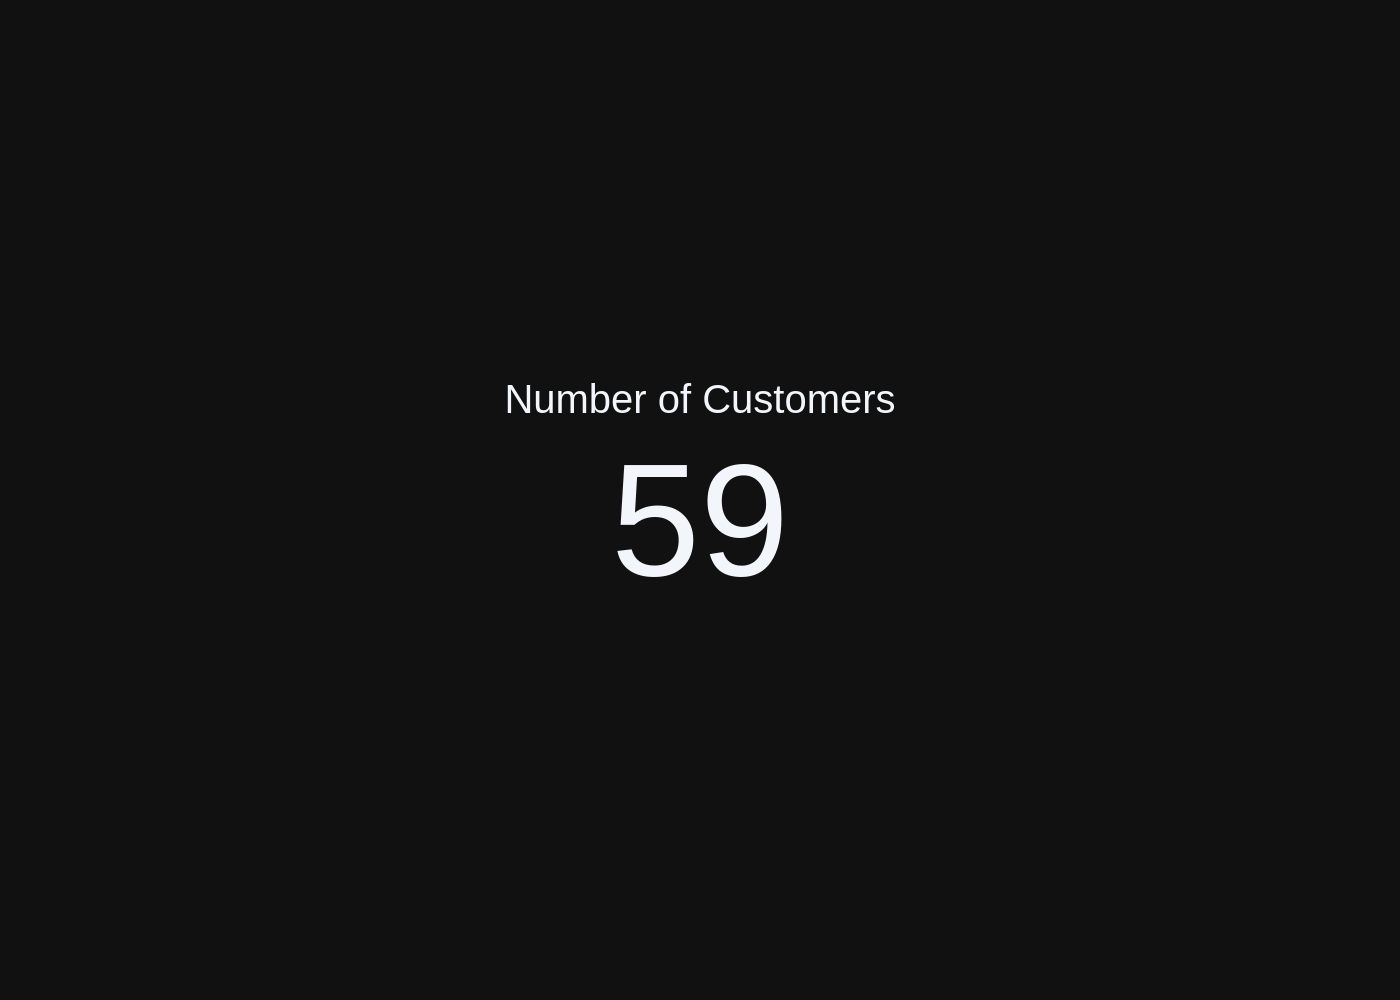

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Customer\n(\n    CustomerId INTEGER  NOT NULL,\n    FirstName NVARCHAR(40)  NOT NULL,\n    LastName NVARCHAR(20)  NOT NULL,\n    Company NVARCHAR(80),\n    Address NVARCHAR(70),\n    City NVARCHAR(40),\n    State NVARCHAR(40),\n    Country NVARCHAR(40),\n    PostalCode NVARCHAR(10),\n    Phone NVARCHAR(24),\n    Fax NVARCHAR(24),\n    Email NVARCHAR(60)  NOT NULL,\n    SupportRepId INTEGER,\n    CONSTRAINT PK_Customer PRIMARY KEY  (CustomerId),\n    FOREIGN KEY (SupportRepId) REFERENCES Employee (EmployeeId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE Invoice\n(\n    InvoiceId INTEGER  NOT NULL,\n    CustomerId INTEGER  NOT NULL,\n    InvoiceDate DATETIME  NOT NULL,\n    BillingAddress NVARCHAR(70)

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


Info: Ollama Response:
{'model': 'deepseek-coder-v2:latest', 'created_at': '2024-10-19T02:02:08.863417684Z', 'message': {'role': 'assistant', 'content': ' To find the top 5 countries that customers come from, we can use the following SQL query on the `Customer` table, which contains information about both customers and their respective countries. This assumes that each customer record corresponds to a unique country. If there are multiple entries for the same country due to shared billing addresses or other reasons, you may need to aggregate these results accordingly:\n\n```sql\nSELECT BillingCountry AS Country, COUNT(*) AS CustomerCount\nFROM Customer\nGROUP BY BillingCountry\nORDER BY CustomerCount DESC\nLIMIT 5;\n```'}, 'done_reason': 'stop', 'done': True, 'total_duration': 54807040289, 'load_duration': 12341432, 'prompt_eval_count': 1413, 'prompt_eval_duration': 44759937000, 'eval_count': 114, 'eval_duration': 9533713000}
LLM Response:  To find the top 5 countries that customers co

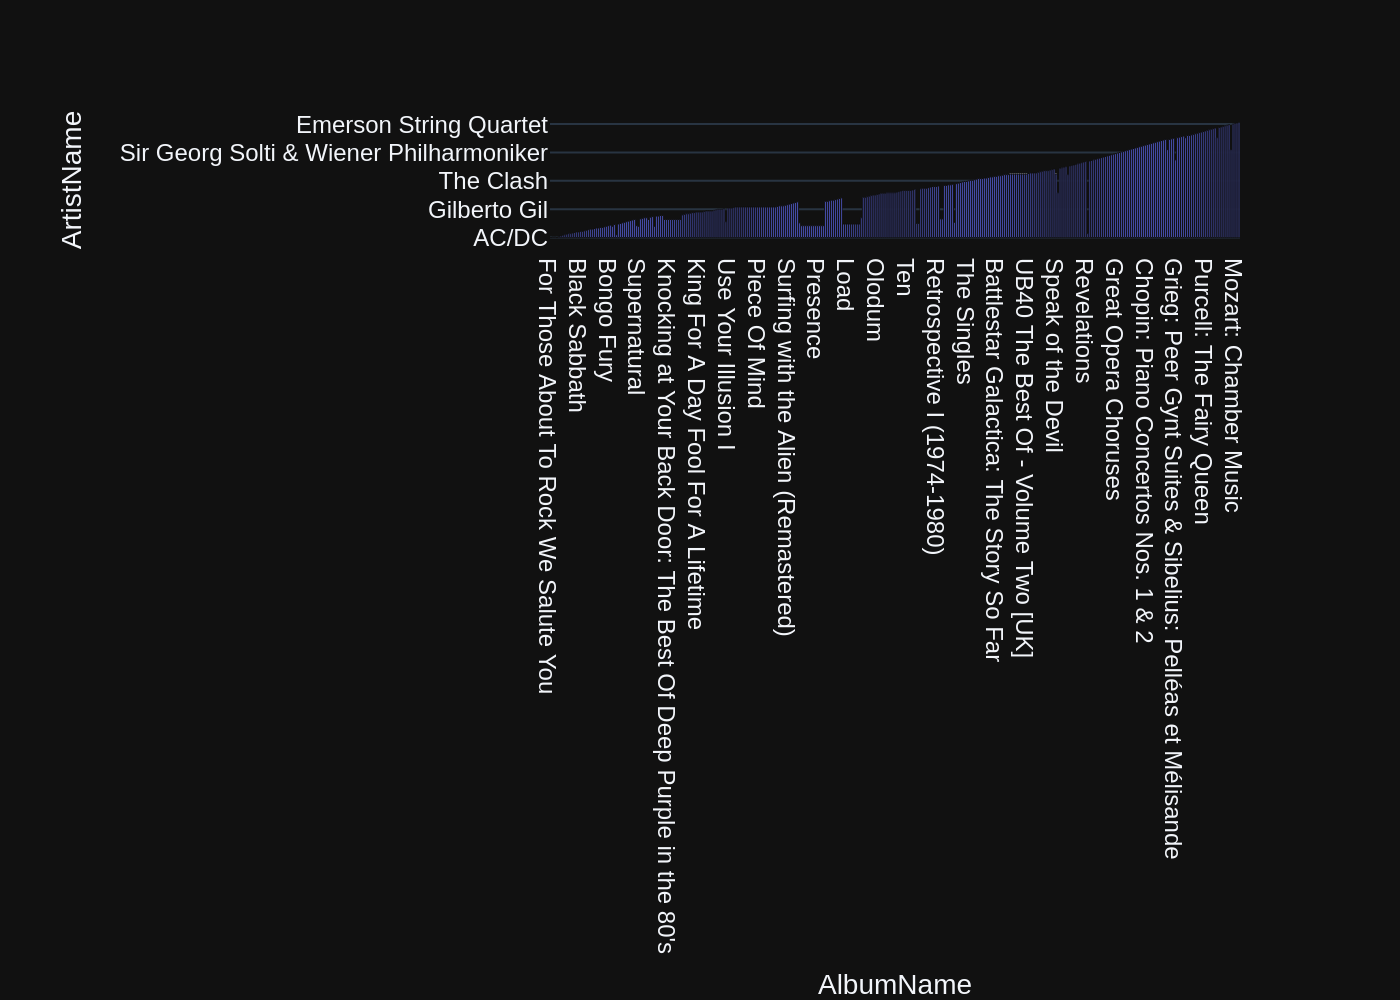

Number of requested results 10 is greater than number of elements in index 3, updating n_results = 3
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_TrackGenreId ON Track (GenreId)\n\nCREATE TABLE Track\n(\n    TrackId INTEGER  NOT NULL,\n    Name NVARCHAR(200)  NOT NULL,\n    AlbumId INTEGER,\n    MediaTypeId INTEGER  NOT NULL,\n    GenreId INTEGER,\n    Composer NVARCHAR(220),\n    Milliseconds INTEGER  NOT NULL,\n    Bytes INTEGER,\n    UnitPrice NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Track PRIMARY KEY  (TrackId),\n    FOREIGN KEY (AlbumId) REFERENCES Album (AlbumId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (GenreId) REFERENCES Genre (GenreId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (MediaTypeId) REFERENCES MediaType (MediaTypeId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX IFK_TrackAlb

In [16]:
for n, question in enumerate(questions):
    # if n != 4: continue
    
    if n > 5: continue
        
    vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
    # my_vn_ask(question=question, sql_id=n+2, allow_llm_to_see_data=allow_llm_to_see_data)

### Check completion time

In [16]:
ts_stop = time()
elapsed_time = ts_stop - ts_start
str_elapsed_sec = f"{elapsed_time:.0f}"
ts = datetime.now().strftime("%Y%m%d-%H%M%S")
print(f"Completed testing:\n================\n LLM model '{model_name}' \n took {str_elapsed_sec} sec\n run on '{hostname}' \n at {ts}")

Completed testing:
 LLM model 'deepseek-coder-v2' 
 took 1650 sec
 run on 'ducklover1' 
 at 20241012-133825


In [17]:
file_csv = f"training_data-{model_name}-{str_elapsed_sec}s-{hostname}-{ts}.csv"
file_csv

'training_data-deepseek-coder-v2-1650s-ducklover1-20241012-133825.csv'

### Save training data

In [18]:
# show training data
df_training_data = vn.get_training_data()
df_training_data

,id,question,content,training_data_type
0,1d7747b2-4595-50e7-aba6-e9977afc4481-sql,List all genres and the number of tracks in ea...,"\nSELECT g.Name AS GenreName, COUNT(t.TrackId...",sql
1,1fab2c67-0737-56ab-b3f1-33202750520a-sql,Find the top 5 most expensive tracks (based on...,"SELECT Name, UnitPrice\nFROM tracks\nORDER BY...",sql
2,2057af51-0925-581d-aad4-e1c8fa6b02de-sql,Find the customer who bought the most albums i...,"SELECT c.CustomerId, c.FirstName, c.LastName...",sql
3,2e2c32b7-40e9-5f31-975e-f70304ca85be-sql,\n Can you find the top 10 most popula...,"SELECT a.ArtistId, a.Name AS ArtistName, COUN...",sql
4,30dadc3c-1c94-52c5-a81e-4970d8d4c0cd-sql,Get all playlists containing at least 10 track...,"SELECT p.PlaylistId, COUNT(pt.TrackId) AS Trac...",sql
5,36d67a5d-4f89-5592-a61a-d8a768bcf02c-sql,Get the average invoice total for each customer:,"SELECT CustomerId, AVG(Total) AS AverageInvoi...",sql
6,3c42c397-fe40-5629-ba95-4c8764b87790-sql,"Find all tracks with a name containing ""What"" ...",SELECT * FROM tracks\nWHERE LOWER(Name) LIKE ...,sql
7,5610475a-bbee-5f6a-bb08-7987a50220a7-sql,List all albums and their corresponding artist...,"SELECT a.Title AS AlbumTitle, ar.Name AS Artis...",sql
8,59ee3f97-0080-5db6-b709-b94fb9308167-sql,Find the total number of invoices per country,"SELECT BillingCountry, COUNT(*) AS TotalInvoi...",sql
9,5f93b5e8-549d-5c06-bf3f-22f32f65b1c5-sql,\n For the question what are the top 5 ...,"SELECT country AS Top5Countries, COUNT(*) AS C...",sql


In [19]:
df_training_data.to_csv(file_csv, index=False)